分析结果：
```
    测试和优化方案：
    测试周期：  2013.1~2023.1（10年）
    测试窗口    2年、3年、5年
    滚动窗口    3个月滚动一次，每年4个滚动
    测试数量：  8x4+7x4+5x4= 32+28+20 = 80个测试（ 剩余年数 * 年移动4次）
```

In [11]:
import pandas as pd

df = pd.read_csv("../debug/510310,510500,159915,588090_20130101_20230101_2,3,5_3.csv")
#df = pd.read_csv("../debug/510500_20130101_20230101_2,3,5_3.csv")
df1 = df[["基金代码", "投资起始", "投资结束", "组合年化","组合收益","基准收益", "基金收益"]]
plus = df1[df['组合收益']>0]
minus = df1[df['组合收益']<0]
good = df1[df['组合收益']>df['基金收益']]
bad = df1[df['组合收益']<df['基金收益']]

print(f"一共测试了{len(df1)}个场景")
print(f"平均年化：{df['组合年化'].mean()}")
print(f"年化方差：{df['组合年化'].std()}")
print(f"最大年化：{df['组合年化'].max()}")
print(f"最小年化：{df['组合年化'].min()}")
print(f"负收益比例：{len(minus)/len(df1)}")
print(f"强于基金比例：{len(good)/len(df1)}")
print("比基金差的情况：")
print(bad)
print("年化为负的情况：")
print(minus)


一共测试了227个场景
平均年化：0.11131080758332963
年化方差：0.10735807252846995
最大年化：0.4240757879845462
最小年化：-0.0580243578537572
负收益比例：0.11894273127753303
强于基金比例：0.748898678414097
比基金差的情况：
       基金代码      投资起始      投资结束      组合年化      组合收益      基准收益      基金收益
0    510310  20160104  20171231  0.008116  0.016298  0.003311  0.208263
4    510500  20200102  20211231  0.168919  0.366371  0.179754  0.421718
5    159915  20200102  20211231  0.168919  0.366371  0.179754  0.825859
10   510310  20130402  20180330  0.021237  0.110789  0.422472  0.708858
11   510500  20130402  20180330  0.021237  0.110789  0.422472  0.883944
12   159915  20130402  20180330  0.021237  0.110789  0.422472  1.125078
13   510310  20160405  20180330  0.053940  0.110789  0.037940  0.242736
16   510310  20140702  20170630  0.013472  0.040962  0.550160  0.773646
17   510500  20140702  20170630  0.013472  0.040962  0.550160  0.620356
18   159915  20140702  20170630  0.013472  0.040962  0.550160  0.261411
19   510310  20161010  20190930  0.03

(array([ 3.,  6., 12., 12., 19., 12., 32.,  6.,  3., 10., 14., 24., 12.,
         3., 12.,  4.,  4.,  8.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  8.,
         0.,  0.,  0.,  4.]),
 array([-0.05802436, -0.04195435, -0.02588435, -0.00981434,  0.00625566,
         0.02232567,  0.03839567,  0.05446568,  0.07053568,  0.08660569,
         0.10267569,  0.1187457 ,  0.1348157 ,  0.15088571,  0.16695571,
         0.18302572,  0.19909572,  0.21516572,  0.23123573,  0.24730573,
         0.26337574,  0.27944574,  0.29551575,  0.31158575,  0.32765576,
         0.34372576,  0.35979577,  0.37586577,  0.39193578,  0.40800578,
         0.42407579]),
 <a list of 30 Patch objects>)

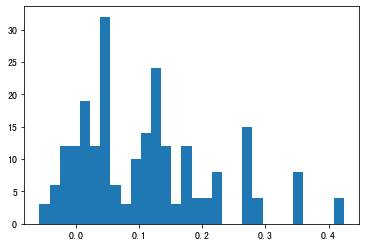

In [12]:
import matplotlib.pyplot as plt
plt.hist(df1['组合年化'],bins=30)